# Astrocytic Sleep Homeostasis Model

In [1]:
#Import libraries
import numpy as np
from pylab import*
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.misc import derivative
from scipy.optimize import fsolve
import pandas as pd

plt.rcParams.update({'font.size': 15})
plt.rcParams.update({'xtick.labelsize':15})
plt.rcParams.update({'ytick.labelsize':15})
plt.rcParams.update({'legend.fontsize':15})

## Two State Homeostat Dynamics

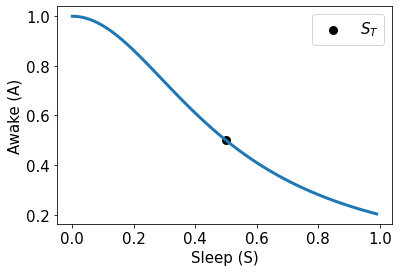

In [2]:
def homeostat(s):
    return sth**n/(s**n+sth**n)
sth = 0.5
n = 2
v = np.arange(0,1,0.01)
plot(v,homeostat(v), lw=3)
xlabel('Sleep (S)', size=15)
ylabel('Awake (A)', size=15)
xticks(size=15)
yticks(size=15)
scatter(0.5,0.5, lw=3,color='k',label=r'$S_{T}$')
legend()
show()

## Two Process Model

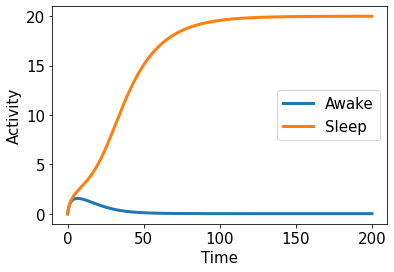

In [3]:
def sleep_wake_cycle(x,t):
    Aw, Sl = x
    dAw = ra/(1+Sl**n) - da*Aw
    dSl = rs/(1+Aw**n) - ds*Sl
    return dAw, dSl

#Parameters
n = 2.0
ra = 1.0
rs = 1.0
da = 0.1
ds = 0.05
ini_tpm = [0,0]
t = np.arange(0,200,0.01)
z = odeint(sleep_wake_cycle, ini_tpm, t)
plot(t,z[:,0],lw=3, label='Awake')
plot(t,z[:,1],lw=3, label='Sleep')
xlabel('Time', size=15)
ylabel('Activity', size=15)
xticks(size=15)
yticks(size=15)
legend()
show()

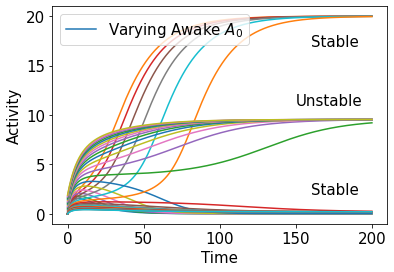

In [4]:
Sl0 = 0.0
for Aw0 in np.arange(0,2,0.1):
    ini_tpm = [Aw0, Sl0]
    z = odeint(sleep_wake_cycle, ini_tpm, t)
    plot(t,z)
xlabel('Time', size=15)
ylabel('Activity', size=15)
legend([r'Varying Awake $A_0$'], loc='upper left')
xticks(size=15)
yticks(size=15)
text(160,17,'Stable' ,fontsize=15)
text(150,11,'Unstable',fontsize=15)
text(160,2,'Stable',fontsize=15)
show()

## Nullclines

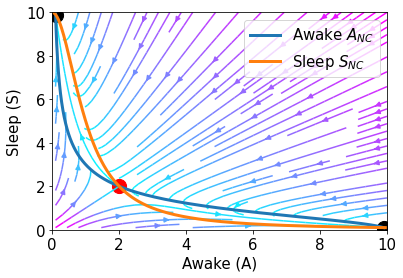

In [5]:
def sleep_wake_cycle(x,t):
    Aw, Sl = x
    dAw = ra/(1+Sl**n) - da*Aw
    dSl = rs/(1+Aw**n) - ds*Sl
    return dAw, dSl

#Params
n = 2.0
ra = 1.0
rs = 1.0
da = 0.1
ds = 0.1
ini_tpm = [0,0]
t = np.arange(0,100,0.1)

def Rss(x):
    return [ra/(1 + x[1]**n) - da*x[0], rs/(1+ x[0]**n) - ds*x[1]]

npts = 1000
Slmin = 0.1; Slmax = 10.0
Awmin = 0.1; Awmax = 10.0
S = np.linspace(Slmin,Slmax,npts)
A = np.linspace(Awmin, Awmax, npts)

Aw_nc = (ra/da)*1/(1+S**n)
Sl_nc = (rs/(ds*S) - 1)**(1/n)

plt.plot(Aw_nc, S, label=r'Awake $A_{NC}$', lw=3)
plt.plot(Sl_nc, S, label=r'Sleep $S_{NC}$', lw=3)

sol1 = fsolve(Rss, [1,10])
plt.scatter(sol1[0], sol1[1], s=200,c='k')
sol2 = fsolve(Rss, [1,1])
plt.scatter(sol2[0], sol2[1], s=200,c='r')
sol3 = fsolve(Rss, [10,2])
plt.scatter(sol3[0], sol3[1], s=200,c='k')

Awa, Sle = np.meshgrid(A,S)
dA, dS = sleep_wake_cycle([Awa, Sle], 0.0)
norm = np.sqrt(dA**2 + dS**2)
sp = plt.streamplot(Awa, Sle, dA, dS, color=norm, cmap=plt.cm.cool, density = 1)
xlabel('Awake (A)', size=15)
ylabel('Sleep (S)', size=15)
xlim([0,Slmax])
ylim([0,Awmax])
xticks(size=15)
yticks(size=15)
#text(3,9,'Nullclines (NC)',bbox=dict(facecolor='white', alpha=1),fontsize=15)
#text(2.2,3,'Unstable',fontsize=15)
#text(0.8,8.5,'Stable',fontsize=15)
#text(8.2,1,'Stable',fontsize=15)
legend(loc='upper right', fontsize=15)
plt.show()

## 2D Stochastic Model

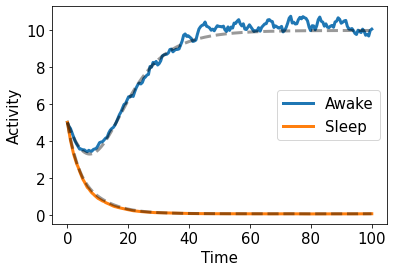

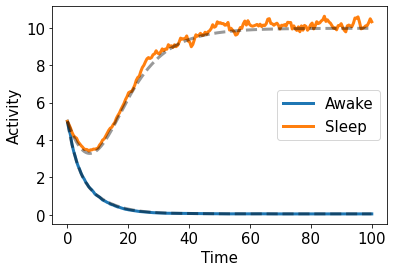

In [6]:
def TwoStateStochasticModel(dA,dS):
    
    #Parameters
    n = 2.0
    ra = 1.0
    rs = 1.0
    Da = dA
    Ds = dS
    #ODE    
    N = 200
    T = 100
    dt = 0.5
    Aw = np.zeros(N)
    Sl = np.zeros(N)
    Aw[0] = 5
    Sl[0] = 5
    sigma = 0.02
    t = np.linspace(0.0,T,N)
    sqdt = np.sqrt(dt)
    
    for i in range(N-1):
        #da = regul_S(i,da)
        Aw[i+1] = Aw[i] + ra/(1+Sl[i]**n)*dt - Da*Aw[i]*dt + sigma*Aw[i]*sqdt*np.random.randn()
        Sl[i+1] = Sl[i] + rs/(1+Aw[i]**n)*dt - Ds*Sl[i]*dt + sigma*Sl[i]*sqdt*np.random.randn()
    #plt.figure(figsize=(8,6))
    plt.plot(t,Aw,'C0',lw=3,label='Awake', alpha=1)
    plt.plot(t,Sl,'C1',lw=3,label='Sleep', alpha=1)
    plt.legend(loc='center right')
    plt.xlabel('Time')
    plt.ylabel('Activity')
    
TwoStateStochasticModel(0.1,0.2)

n = 2.0
ra = 1.0
rs = 1.0
da = 0.1
ds = 0.2
    #t = np.arange(0,200,0.01)
ini_tpm = [5,5]
t = np.arange(0,100,0.1)
z = odeint(sleep_wake_cycle, ini_tpm, t)
xticks(size=15)
yticks(size=15)
plot(t,z[:,0],'--k',lw=3,alpha=0.4)
plot(t,z[:,1],'--k',lw=3,alpha=0.4)
plt.show()

TwoStateStochasticModel(0.2,0.1)
    #t = np.arange(0,200,0.01)
ini_tpm = [5,5]
t = np.arange(0,100,0.1)
z = odeint(sleep_wake_cycle, ini_tpm, t)
xticks(size=15)
yticks(size=15)
plot(t,z[:,0],'--k',lw=3,alpha=0.4)
plot(t,z[:,1],'--k',lw=3,alpha=0.4)
plt.show()

## Sleep Wake with Sleep Pressure

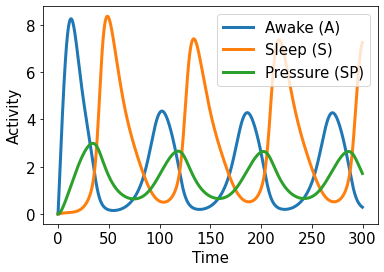

In [7]:
#Prolonging the Awake Phase
def regulate(t):
    if (t>100 and t<150 or t>300 and t<400):
        return 0.02
    else:
        return 0.1

def sleep_wake_with_sleep_pressure(x,t):
    Aw, Sl, Sp = x
    #da = regulate(t)
    dAw = ra/(1+Sl**n) - da*Aw*Sp
    dSl = rs/(1+Aw**n)*Sp - ds*Sl
    dSp = rp*Aw/(Aw+Kp) - srs*Sp*Sl/(Sl + Kp)
    return dAw, dSl, dSp

#Params
n = 2.0
ra = 1.0
rs = 1.0
da = 0.1
ds = 0.2
ns = 1.0
rp = 0.2 
srs = 0.1 #SRS (Sleep Regulatory Substances)
Kp = 5.0

At = 20

ini_swp = [0,0,0]
t = np.arange(0,300,0.1)
z = odeint(sleep_wake_with_sleep_pressure, ini_swp, t)
#figure(figsize=(8,6))
plot(t,z[:,0],'C0', lw=3)
plot(t,z[:,1],'C1', lw=3)
plot(t,z[:,2],'C2', lw=3)
legend(['Awake (A)','Sleep (S)','Pressure (SP)'], loc='upper right', fontsize=15)
xlabel('Time', size=15)
ylabel('Activity',size=15)
xticks(size=15)
yticks(size=15)
show()

## Sleep, Awake, Pressure with Synaptic Strength (Ss)


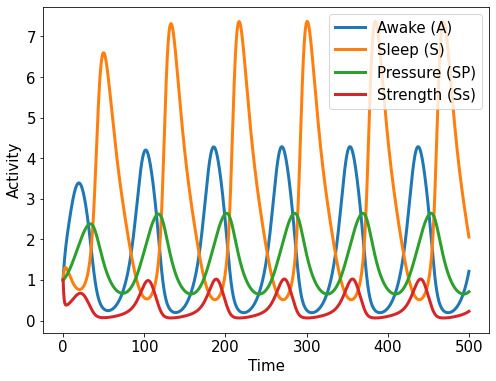

In [8]:
#Prolonging the Awake Phase
def regulate(t):
    if (t>100 and t<150):
        return 0.02
    else:
        return 0.1

def sleep_wake_with_sleep_pressure(x,t,flag,DA):
    Aw, Sl, Sp, Ss = x
    if flag==True:
        DA = regulate(t)
    da=DA
    dAw = ra/(1+Sl**n) - da*Aw*Sp
    dSl = rs/(1+Aw**n)*Sp - ds*Sl
    dSp = rp*Aw**ns/(Aw**ns+Kp**ns) - dp*Sp*Sl**ns/(Sl**ns + Kp**ns)
    dSs = rs0 + rss*Aw - kss*Sl*Ss
    return dAw, dSl, dSp, dSs

#Params
n = 2.0
ra = 1.0
rs = 1.0
da = 0.1
ds = 0.2
ns = 1.0
rp = 0.2
dp = 0.1
Kp = 5.0

rs0 = 0.5
rss = 0.02
kss = 1.1

Sleep_dysfunction_flag = False
DA = 0.1

ini_swp = [1,1,1,1]
t = np.arange(0,500,0.1)
z = odeint(sleep_wake_with_sleep_pressure, ini_swp, t, args=(Sleep_dysfunction_flag,DA,))
plt.figure(figsize=(8,6))
plot(t,z[:,0],'C0', lw=3)
plot(t,z[:,1],'C1', lw=3)
plot(t,z[:,2],'C2', lw=3)
plot(t,z[:,3],'C3', lw=3)
legend(['Awake (A)','Sleep (S)','Pressure (SP)', 'Strength (Ss)'], loc='upper right',fontsize=15)
xlabel('Time', size=15)
ylabel('Activity', size=15)
xticks(size=15)
yticks(size=15)
show()


## Prolonging awake phase between T = 100 to T=150 time units
### #Resulting in a strong sleep phase with high sleep pressure

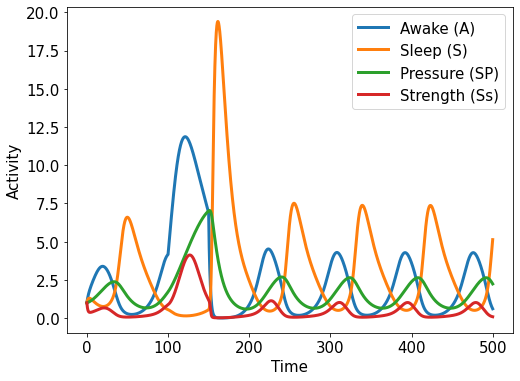

In [9]:
Sleep_dysfunction_flag = True
t = np.arange(0,500,0.1)
z = odeint(sleep_wake_with_sleep_pressure, ini_swp, t, args=(Sleep_dysfunction_flag,DA,))
plt.figure(figsize=(8,6))
plot(t,z[:,0],'C0', lw=3)
plot(t,z[:,1],'C1', lw=3)
plot(t,z[:,2],'C2', lw=3)
plot(t,z[:,3],'C3', lw=3)
legend(['Awake (A)','Sleep (S)','Pressure (SP)', 'Strength (Ss)'], loc='upper right',fontsize=15)
xlabel('Time', size=15)
ylabel('Activity', size=15)
xticks(size=15)
yticks(size=15)
show()

## Stochastic model

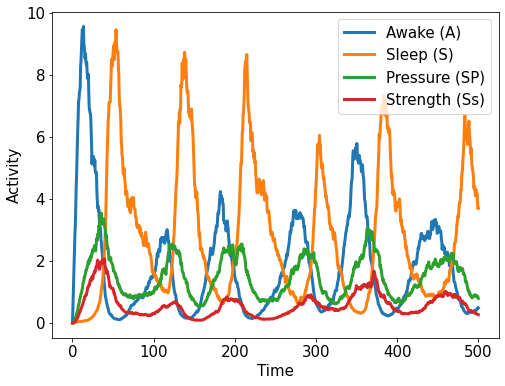

In [10]:
def SAP_Stochastic_Model():
    
    #Parameters
    n = 2.0
    ra = 1.0
    rs = 1.0
    da = 0.1
    ds = 0.2
    ns = 1.0
    rp = 0.2
    dp = 0.1
    Kp = 5.0
    rss = 0.01
    kss = 0.01
    DA = 0.02
    N = 1000
    T = 500
    dt = 0.5
    Aw = np.zeros(N)
    Sl = np.zeros(N)
    Sp = np.zeros(N)
    Ss = np.zeros(N)
    sigma = 0.05
    t = np.linspace(0.0,T,N)
    sqdt = np.sqrt(dt)
    
    for i in range(N-1):
        #da = regul_S(i,da)
        Aw[i+1] = Aw[i] + ra/(1+Sl[i]**n)*dt - da*Aw[i]*Sp[i]*dt + sigma*Aw[i]*sqdt*np.random.randn()
        Sl[i+1] = Sl[i] + rs/(1+Aw[i]**n)*Sp[i]*dt - ds*Sl[i]*dt + sigma*Sl[i]*sqdt*np.random.randn()
        Sp[i+1] = Sp[i] + rp*Aw[i]**ns/(Aw[i]**ns + Kp**ns)*dt - dp*Sp[i]*Sl[i]**ns/(Sl[i]**ns + Kp**ns)*dt + sigma*Sp[i]*sqdt*np.random.randn()
        Ss[i+1] = Ss[i] + rss*Aw[i]*dt - kss*Sl[i]*Ss[i]*dt + sigma*Ss[i]*sqdt*np.random.randn()
    plt.figure(figsize=(8,6))
    plt.plot(t,Aw,lw=3,label='Awake (A)')
    plt.plot(t,Sl,lw=3,label='Sleep (S)')
    plt.plot(t,Sp,lw=3, label='Pressure (SP)')
    plt.plot(t,Ss,lw=3,label='Strength (Ss)')
    plt.legend(loc='upper right')
    plt.xlabel('Time')
    plt.ylabel('Activity')
    plt.show()
    
SAP_Stochastic_Model()

## XPPAUT Data

In [11]:
bf_data = pd.read_csv('xpp/shm_HB_diagram.dat',sep='\s+',names=['X','Y','Z','P1','P2'])
#225 data points
bfs = 225
bf_data.head()

,X,Y,Z,P1,P2
0,0.010000,1.30422,1.30422,2,1
1,0.010248,1.29765,1.29765,1,1
2,0.010502,1.29111,1.29111,1,1
3,0.011033,1.27816,1.27816,1,1
4,0.012187,1.25283,1.25283,1,1


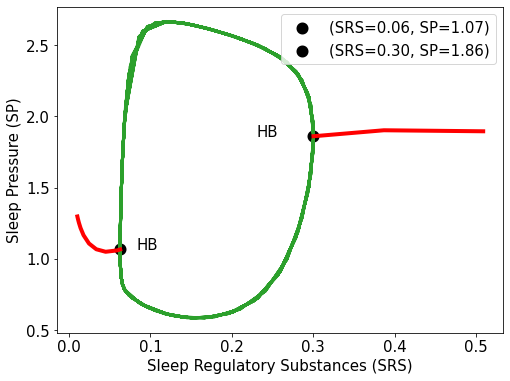

In [12]:
bf = bf_data[bf_data['P2']==2]
plt.figure(figsize=(8,6))
plt.plot(bf.X,bf.Y,color='C2',linewidth=3)
plt.plot(bf.X,bf.Z,color='C2',linewidth=3)
plt.scatter(bf.X[25],bf.Y[25],color='k',label='(SRS=%0.2f, SP=%0.2f)'%(bf.X[25],bf.Y[25]),linewidth=6)
plt.text(bf.X[25]+0.02,bf.Y[25],'HB',color='k',fontsize=15)
bf = bf_data[bf_data['P2']==1]
plt.plot(bf.X.loc[1:11],bf.Y.loc[1:11],'r',linewidth=4)
plt.plot(bf.X.loc[19:21],bf.Y.loc[19:21],'r',linewidth=4)
plt.scatter(bf.X[19],bf.Y[19], color='k',label='(SRS=%0.2f, SP=%0.2f)'%(bf.X[19],bf.Y[19]),lw=6)
plt.text(bf.X[19]-0.07,bf.Y[19],'HB',color='k',fontsize=15)

# #plot params
plt.ylabel('Sleep Pressure (SP)',fontsize=15)
plt.xlabel('Sleep Regulatory Substances (SRS)',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(loc='upper right',fontsize=15)
#savefig('srs_HopfBifurcation.png',dpi=600)
plt.show()